<a id='tableofcontents'></a>
<div style='background-color:lightblue'>
    <b><i><h1 style='text-align:center ; padding-top:5px'>
        Table of Contents
    </h1></i></b>
    <li><a href='#imports'>Imports</a>
    <li><a href='#initial'>Initial Setup</a>
    <li><a href='#explore1'>Random Tangent 1</a>
    <li><a href='#explore2'>Random Tangent 2</a>
    <li><a href='#explore3'>Random Tangent 3</a>
    <li><a href='#misc'>Miscellaneous</a>
    </li>
</div>

<b><u><i><h3 style='text-align:center'>
    ORIENTATION
</h3></i></u></b>

This is an extension of what was initally completed from the first iteration of exploration and modeling...  Thus, this is intended for additional exploration and 'Rabbit-Holes' to go down.

<a id='imports'></a>
<div style='background-color:lightblue'>
    <b><i><h1 style='text-align:center ; padding-top:5px'>
        Imports
    </h1></i></b>
    <li><a href='#tableofcontents'>Back to Table of Contents</a>
    </li>
</div>

In [1]:
# Vectorization and dataframing
import numpy as np
import pandas as pd

# Visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# .py Files
import wrangle as w

<a id='initial'></a>
<div style='background-color:lightblue'>
    <b><i><h1 style='text-align:center ; padding-top:5px'>
        Initial Setup
    </h1></i></b>
    <li><a href='#tableofcontents'>Back to Table of Contents</a>
    </li>
</div>

In [2]:
# Get the unaggregated version of the dataframe
mass_shooters_df = w.unaggregated_mass_shooters()
mass_shooters_df.sample()

,Case #,Day of Week,Day,Month,Year,City,State,County,Urban/Suburban/Rural,Number Killed,...,social_media_use_na,pop_culture_connection_no_evidence,pop_culture_connection_explicit_reference,pop_culture_connection_tangential_reference,firearm_proficiency_no_experience,firearm_proficiency_some_experience,firearm_proficiency_more_experienced,firearm_proficiency_very_experienced,agg_casualties,shooter_volatility
5,6,Wednesday,23,9,1970,Albany,NY,Albany County,0,4,...,1,1,0,0,0,0,1,0,4,Low Volatility


<a id='explore1'></a>
<div style='background-color:lightblue'>
    <b><i><h1 style='text-align:center ; padding-top:5px'>
        Random Tangent 1
    </h1></i></b>
    <li><a href='#tableofcontents'>Back to Table of Contents</a>
    <li><a href='#explore1signsofcrisis'>Break Apart agg_signs_of_crisis</a>
    <li><a href='#explore1motivationhatred'>Break Apart agg_motivation_hatred</a>
    <li><a href='#explore1motivationpersonal'>Break Apart agg_motivation_personal</a>
    <li><a href='#explore1social'>Break Apart agg_social</a>
    <li><a href='#explore1trauma'>Break Apart agg_trauma</a>
    <li><a href='#explore1health'>Break Apart agg_health</a>
    <li><a href='#explore1background'>Break Apart agg_background</a>
    <li><a href='#explore1crime'>Break Apart agg_crime</a>
    <li><a href='#explore1stress'>Break Apart agg_stress</a>
    <li><a href='#explore1substanceabuse'>Break Apart agg_substance_abuse</a>
    <li><a href='#explore1prejudice'>Break Apart agg_prejudice</a>
    </li>
</div>

<b><u><i><h3 style='text-align:center'>
    ORIENTATION
</h3></i></u></b>

Break apart the aggregate columns to identify any trends or patterns within each group now that time is alotted...

---

<a id='explore1signsofcrisis'></a>
<b><i><h3 style='text-align:center'>
    Break Apart agg_signs_of_crisis
</h3></i></b>
<li><a href='#explore1'>Random Tangent 1 Top</a></li>

- 10 columns
    - 'Signs of Being in Crisis',
    - 'Inability to Perform Daily Tasks',
    - 'Notably Depressed Mood',
    - 'Unusually Calm or Happy',
    - 'Rapid Mood Swings',
    - 'Increased Agitation',
    - 'Abusive Behavior',
    - 'Isolation',
    - 'Losing Touch with Reality',
    - 'Paranoia'

In [3]:
# Create list of above columns with target variable
signs_of_crisis = [
    'Signs of Being in Crisis',
    'Inability to Perform Daily Tasks',
    'Notably Depressed Mood',
    'Unusually Calm or Happy',
    'Rapid Mood Swings',
    'Increased Agitation',
    'Abusive Behavior',
    'Isolation',
    'Losing Touch with Reality',
    'Paranoia',
    'agg_casualties'
]

In [4]:
# Create temp df for specific exploratory purposes
signs_of_crisis_df = mass_shooters_df[signs_of_crisis]
signs_of_crisis_df.sample()

,Signs of Being in Crisis,Inability to Perform Daily Tasks,Notably Depressed Mood,Unusually Calm or Happy,Rapid Mood Swings,Increased Agitation,Abusive Behavior,Isolation,Losing Touch with Reality,Paranoia,agg_casualties
60,0,0,0,0,0,0,0,0,0,0,8


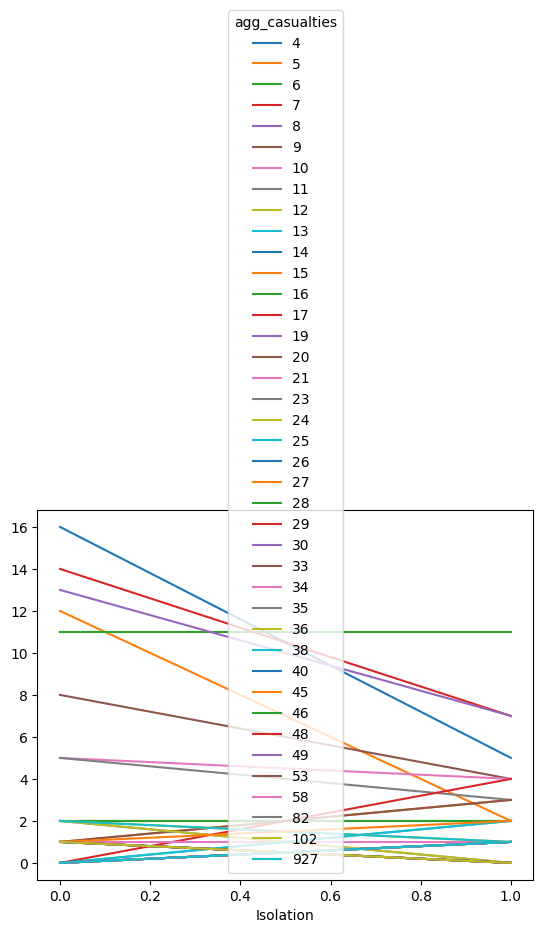

In [31]:
pd.crosstab(signs_of_crisis_df.Isolation, signs_of_crisis_df.agg_casualties).plot()
plt.show()

---

<a id='explore1motivationhatred'></a>
<b><i><h3 style='text-align:center'>
    Break Apart agg_motivation_hatred
</h3></i></b>
<li><a href='#explore1'>Random Tangent 1 Top</a></li>

- 2 columns
    - 'Motive: Misogyny',
    - 'Motive: Homophobia'

In [5]:
# Create list of above columns with target variable
motivation_hatred = [
    'Motive: Misogyny',
    'Motive: Homophobia',
    'agg_casualties'
]

In [6]:
# Create temp df for specific exploratory purposes
motivation_hatred_df = mass_shooters_df[motivation_hatred]
motivation_hatred_df.sample()

,Motive: Misogyny,Motive: Homophobia,agg_casualties
155,0,0,5


---

<a id='explore1motivationpersonal'></a>
<b><i><h3 style='text-align:center'>
    Break Apart agg_motivation_personal
</h3></i></b>
<li><a href='#explore1'>Random Tangent 1 Top</a></li>

- 6 columns
    - 'Motive: Employment Issue',
    - 'Motive: Economic Issue',
    - 'Motive: Legal Issue',
    - 'Motive: Relationship Issue',
    - 'Motive: Interpersonal Conflict\xa0',
    - 'Motive: Fame-Seeking'

In [7]:
# Create list of above columns with target variable
motivation_personal = [
    'Motive: Employment Issue',
    'Motive: Economic Issue',
    'Motive: Legal Issue',
    'Motive: Relationship Issue',
    'Motive: Interpersonal Conflict\xa0',
    'Motive: Fame-Seeking',
    'agg_casualties'
]

In [8]:
# Create temp df for specific exploratory purposes
motivation_personal_df = mass_shooters_df[motivation_personal]
motivation_personal_df.sample()

,Motive: Employment Issue,Motive: Economic Issue,Motive: Legal Issue,Motive: Relationship Issue,Motive: Interpersonal Conflict,Motive: Fame-Seeking,agg_casualties
34,0,0,0,0,0,0,9


---

<a id='explore1social'></a>
<b><i><h3 style='text-align:center'>
    Break Apart agg_social
</h3></i></b>
<li><a href='#explore1'>Random Tangent 1 Top</a></li>

- 5 columns
    - 'Leakage\xa0',
    - 'Interest in Past Mass Violence',
    - 'Relationship with Other Shooting(s)',
    - 'Planning',
    - 'Performance'

In [9]:
# Create list of above columns with target variable
social = [
    'Leakage\xa0',
    'Interest in Past Mass Violence',
    'Relationship with Other Shooting(s)',
    'Planning',
    'Performance',
    'agg_casualties'
]

In [10]:
# Create temp df for specific exploratory purposes
social_df = mass_shooters_df[social]
social_df.sample()

,Leakage,Interest in Past Mass Violence,Relationship with Other Shooting(s),Planning,Performance,agg_casualties
10,0,0,0,0,0,9


---

<a id='explore1trauma'></a>
<b><i><h3 style='text-align:center'>
    Break Apart agg_trauma
</h3></i></b>
<li><a href='#explore1'>Random Tangent 1 Top</a></li>

- 20 columns
    - 'Bullied',
    - 'Raised by Single Parent',
    - 'Parental Divorce / Separation',
    - 'Parental Death in Childhood',
    - 'Parental Suicide',
    - 'Childhood Trauma',
    - 'Physically Abused',
    - 'Sexually Abused',
    - 'Emotionally Abused',
    - 'Neglected',
    - 'Mother Violent Treatment',
    - 'Parental Substance Abuse',
    - 'Parent Criminal Record',
    - 'Family Member Incarcerated',
    - 'adult_trauma_death_of_parent',
    - 'adult_trauma_death_or_loss_of_child',
    - 'adult_trauma_death_of_family_member_causing_significant_distress',
    - 'adult_trauma_from_war',
    - 'adult_trauma_accident',
    - 'adult_trauma_other'

In [11]:
# Create list of above columns with target variable
trauma = [
    'Bullied',
    'Raised by Single Parent',
    'Parental Divorce / Separation',
    'Parental Death in Childhood',
    'Parental Suicide',
    'Childhood Trauma',
    'Physically Abused',
    'Sexually Abused',
    'Emotionally Abused',
    'Neglected',
    'Mother Violent Treatment',
    'Parental Substance Abuse',
    'Parent Criminal Record',
    'Family Member Incarcerated',
    'adult_trauma_death_of_parent',
    'adult_trauma_death_or_loss_of_child',
    'adult_trauma_death_of_family_member_causing_significant_distress',
    'adult_trauma_from_war',
    'adult_trauma_accident',
    'adult_trauma_other',
    'agg_casualties'
]

In [12]:
# Create temp df for specific exploratory purposes
trauma_df = mass_shooters_df[trauma]
trauma_df.sample()

,Bullied,Raised by Single Parent,Parental Divorce / Separation,Parental Death in Childhood,Parental Suicide,Childhood Trauma,Physically Abused,Sexually Abused,Emotionally Abused,Neglected,...,Parental Substance Abuse,Parent Criminal Record,Family Member Incarcerated,adult_trauma_death_of_parent,adult_trauma_death_or_loss_of_child,adult_trauma_death_of_family_member_causing_significant_distress,adult_trauma_from_war,adult_trauma_accident,adult_trauma_other,agg_casualties
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4


---

<a id='explore1health'></a>
<b><i><h3 style='text-align:center'>
    Break Apart agg_health
</h3></i></b>
<li><a href='#explore1'>Random Tangent 1 Top</a></li>

- 13 columns
    - 'Prior Hospitalization',
    - 'Prior Counseling',
    - 'Psychiatric Medication',
    - 'FASD (Fetal Alcohol Spectrum Disorder)',
    - 'Autism Spectrum',
    - 'Health Issues',
    - 'Head Injury / Possible TBI',
    - 'voluntary_or_mandatory_counseling_voluntary',
    - 'voluntary_or_mandatory_counseling_involuntary',
    - 'mental_illness_mood_disorder',
    - 'mental_illness_thought_disorder',
    - 'mental_illness_other_psychiatric_disorder',
    - 'mental_illness_indication_but_no_diagnosis'

In [13]:
# Create list of above columns with target variable
health = [
    'Prior Hospitalization',
    'Prior Counseling',
    'Psychiatric Medication',
    'FASD (Fetal Alcohol Spectrum Disorder)',
    'Autism Spectrum',
    'Health Issues',
    'Head Injury / Possible TBI',
    'voluntary_or_mandatory_counseling_voluntary',
    'voluntary_or_mandatory_counseling_involuntary',
    'mental_illness_mood_disorder',
    'mental_illness_thought_disorder',
    'mental_illness_other_psychiatric_disorder',
    'mental_illness_indication_but_no_diagnosis',
    'agg_casualties'
]

In [14]:
# Create temp df for specific exploratory purposes
health_df = mass_shooters_df[health]
health_df.sample()

,Prior Hospitalization,Prior Counseling,Psychiatric Medication,FASD (Fetal Alcohol Spectrum Disorder),Autism Spectrum,Health Issues,Head Injury / Possible TBI,voluntary_or_mandatory_counseling_voluntary,voluntary_or_mandatory_counseling_involuntary,mental_illness_mood_disorder,mental_illness_thought_disorder,mental_illness_other_psychiatric_disorder,mental_illness_indication_but_no_diagnosis,agg_casualties
173,0,0,0,0,0,0,0,0,0,0,0,0,1,7


---

<a id='explore1background'></a>
<b><i><h3 style='text-align:center'>
    Break Apart agg_background
</h3></i></b>
<li><a href='#explore1'>Random Tangent 1 Top</a></li>

- 4 columns
    - 'Immigrant',
    - 'Sexual Orientation',
    - 'known_family_mental_health_history_parents',
    - 'known_family_mental_health_history_other_relative'

In [15]:
# Create list of above columns with target variable
background = [
    'Immigrant',
    'Sexual Orientation',
    'known_family_mental_health_history_parents',
    'known_family_mental_health_history_other_relative',
    'agg_casualties'
]

In [16]:
# Create temp df for specific exploratory purposes
background_df = mass_shooters_df[background]
background_df.sample()

,Immigrant,Sexual Orientation,known_family_mental_health_history_parents,known_family_mental_health_history_other_relative,agg_casualties
7,0,0,0,0,12


---

<a id='explore1crime'></a>
<b><i><h3 style='text-align:center'>
    Break Apart agg_crime
</h3></i></b>
<li><a href='#explore1'>Random Tangent 1 Top</a></li>

- 32 columns
    - 'Known to Police or FBI',
    - 'Criminal Record',
    - 'History of Animal Abuse',
    - 'History of Sexual Offenses',
    - 'Gang Affiliation',
    - 'Terror Group Affiliation',
    - 'Bully',
    - 'part_i_crimes_homicide',
    - 'part_i_crimes_forcible_rape',
    - 'part_i_crimes_robbery',
    - 'part_i_crimes_aggravated_assault',
    - 'part_i_crimes_burglary',
    - 'part_i_crimes_larceny_theft',
    - 'part_i_crimes_motor_vehicle_theft',
    - 'part_i_crimes_arson',
    - 'part_ii_crimes_simple_assault',
    - 'part_ii_crimes_fraud_forgery_embezzlement',
    - 'part_ii_crimes_stolen_property',
    - 'part_ii_crimes_vandalism',
    - 'part_ii_crimes_weapons_offenses',
    - 'part_ii_crimes_prostitution',
    - 'part_ii_crimes_drugs',
    - 'part_ii_crimes_dui',
    - 'part_ii_crimes_other',
    - 'domestic_abuse_specified_non_sexual',
    - 'domestic_abuse_specified_sexual_violence',
    - 'domestic_abuse_specified_threats_coercive_control',
    - 'domestic_abuse_specified_threats_with_deadly_weapon',
    - 'highest_level_of_justice_system_involvement_suspected',
    - 'highest_level_of_justice_system_involvement_arrested',
    - 'highest_level_of_justice_system_involvement_charged',
    - 'highest_level_of_justice_system_involvement_convicted'

In [17]:
# Create list of above columns with target variable
crime = [
    'Known to Police or FBI',
    'Criminal Record',
    'History of Animal Abuse',
    'History of Sexual Offenses',
    'Gang Affiliation',
    'Terror Group Affiliation',
    'Bully',
    'part_i_crimes_homicide',
    'part_i_crimes_forcible_rape',
    'part_i_crimes_robbery',
    'part_i_crimes_aggravated_assault',
    'part_i_crimes_burglary',
    'part_i_crimes_larceny_theft',
    'part_i_crimes_motor_vehicle_theft',
    'part_i_crimes_arson',
    'part_ii_crimes_simple_assault',
    'part_ii_crimes_fraud_forgery_embezzlement',
    'part_ii_crimes_stolen_property',
    'part_ii_crimes_vandalism',
    'part_ii_crimes_weapons_offenses',
    'part_ii_crimes_prostitution',
    'part_ii_crimes_drugs',
    'part_ii_crimes_dui',
    'part_ii_crimes_other',
    'domestic_abuse_specified_non_sexual',
    'domestic_abuse_specified_sexual_violence',
    'domestic_abuse_specified_threats_coercive_control',
    'domestic_abuse_specified_threats_with_deadly_weapon',
    'highest_level_of_justice_system_involvement_suspected',
    'highest_level_of_justice_system_involvement_arrested',
    'highest_level_of_justice_system_involvement_charged',
    'highest_level_of_justice_system_involvement_convicted',
    'agg_casualties'
]

In [18]:
# Create temp df for specific exploratory purposes
crime_df = mass_shooters_df[crime]
crime_df.sample()

,Known to Police or FBI,Criminal Record,History of Animal Abuse,History of Sexual Offenses,Gang Affiliation,Terror Group Affiliation,Bully,part_i_crimes_homicide,part_i_crimes_forcible_rape,part_i_crimes_robbery,...,part_ii_crimes_other,domestic_abuse_specified_non_sexual,domestic_abuse_specified_sexual_violence,domestic_abuse_specified_threats_coercive_control,domestic_abuse_specified_threats_with_deadly_weapon,highest_level_of_justice_system_involvement_suspected,highest_level_of_justice_system_involvement_arrested,highest_level_of_justice_system_involvement_charged,highest_level_of_justice_system_involvement_convicted,agg_casualties
62,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,7


---

<a id='explore1stress'></a>
<b><i><h3 style='text-align:center'>
    Break Apart agg_stress
</h3></i></b>
<li><a href='#explore1'>Random Tangent 1 Top</a></li>

- 9 columns
    - 'Employment Status',
    - 'recent_or_ongoing_stressor_recent_breakup',
    - 'recent_or_ongoing_stressor_employment',
    - 'recent_or_ongoing_stressor_economic_stressor',
    - 'recent_or_ongoing_stressor_family_issue',
    - 'recent_or_ongoing_stressor_legal_issue',
    - 'recent_or_ongoing_stressor_other',
    - 'history_of_physical_altercations_yes',
    - 'history_of_physical_altercations_attacked_inanimate_objects_during_arguments'

In [19]:
# Create list of above columns with target variable
stress = [
    'Employment Status',
    'recent_or_ongoing_stressor_recent_breakup',
    'recent_or_ongoing_stressor_employment',
    'recent_or_ongoing_stressor_economic_stressor',
    'recent_or_ongoing_stressor_family_issue',
    'recent_or_ongoing_stressor_legal_issue',
    'recent_or_ongoing_stressor_other',
    'history_of_physical_altercations_yes',
    'history_of_physical_altercations_attacked_inanimate_objects_during_arguments',
    'agg_casualties'
]

In [20]:
# Create temp df for specific exploratory purposes
stress_df = mass_shooters_df[stress]
stress_df.sample()

,Employment Status,recent_or_ongoing_stressor_recent_breakup,recent_or_ongoing_stressor_employment,recent_or_ongoing_stressor_economic_stressor,recent_or_ongoing_stressor_family_issue,recent_or_ongoing_stressor_legal_issue,recent_or_ongoing_stressor_other,history_of_physical_altercations_yes,history_of_physical_altercations_attacked_inanimate_objects_during_arguments,agg_casualties
187,0,0,0,0,0,0,0,1,0,24


---

<a id='explore1substanceabuse'></a>
<b><i><h3 style='text-align:center'>
    Break Apart agg_substance_abuse
</h3></i></b>
<li><a href='#explore1'>Random Tangent 1 Top</a></li>

- 3 columns
    - 'substance_use_alcohol',
    - 'substance_use_marijuana',
    - 'substance_use_other_drugs'

In [21]:
# Create list of above columns with target variable
substance_abuse = [
    'substance_use_alcohol',
    'substance_use_marijuana',
    'substance_use_other_drugs',
    'agg_casualties'
]

In [22]:
# Create temp df for specific exploratory purposes
substance_abuse_df = mass_shooters_df[substance_abuse]
substance_abuse_df.sample()

,substance_use_alcohol,substance_use_marijuana,substance_use_other_drugs,agg_casualties
14,0,0,0,4


---

<a id='explore1prejudice'></a>
<b><i><h3 style='text-align:center'>
    Break Apart agg_prejudice
</h3></i></b>
<li><a href='#explore1'>Random Tangent 1 Top</a></li>

- 4 columns
    - 'known_prejudices_racism',
    - 'known_prejudices_misogyny',
    - 'known_prejudices_homophobia',
    - 'known_prejudices_religious_hatred'

In [23]:
# Create list of above columns with target variable
prejudice = [
    'known_prejudices_racism',
    'known_prejudices_misogyny',
    'known_prejudices_homophobia',
    'known_prejudices_religious_hatred',
    'agg_casualties'
]

In [24]:
# Create temp df for specific exploratory purposes
prejudice_df = mass_shooters_df[prejudice]
prejudice_df.sample()

,known_prejudices_racism,known_prejudices_misogyny,known_prejudices_homophobia,known_prejudices_religious_hatred,agg_casualties
92,0,0,0,0,7


<a id='explore2'></a>
<div style='background-color:lightblue'>
    <b><i><h1 style='text-align:center ; padding-top:5px'>
        Random Tangent 2
    </h1></i></b>
    <li><a href='#tableofcontents'>Back to Table of Contents</a>
    </li>
</div>

<a id='explore3'></a>
<div style='background-color:lightblue'>
    <b><i><h1 style='text-align:center ; padding-top:5px'>
        Random Tangent 3
    </h1></i></b>
    <li><a href='#tableofcontents'>Back to Table of Contents</a>
    </li>
</div>

<a id='misc'></a>
<div style='background-color:lightblue'>
    <b><i><h1 style='text-align:center ; padding-top:5px'>
        Miscellaneous
    </h1></i></b>
    <li><a href='#tableofcontents'>Back to Table of Contents</a>
    </li>
</div>